## Part 1. Introduction: point cloud data

In [1]:
# the lines below load necessary Python libraries 
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle
np.random.seed(300)

### 1.1. Examples of point clouds

Real data is often given as an unorganized collection of objects with numerical features or coordinates. Such objects can be usually considered as points in a space (Euclidean or a more general space with a distance function). 

A typical example is a noisy cloud of points sampled from a round circle in the plane, which is generated by the code below. 

In the following (and any other) code feel free to change various parameters to see how the output changes.

<IPython.core.display.Javascript object>


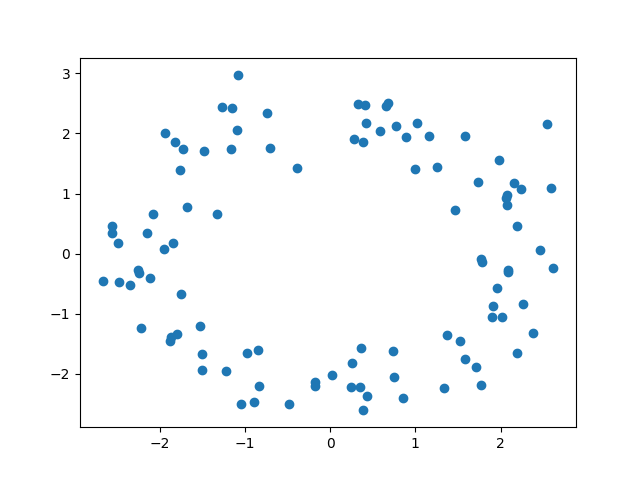

In [2]:
# specify a number of sample points
N = 100

# specify a linear space
theta = np.linspace(0, 2*np.pi, N)

# specify a radius
r = np.sqrt(5)

# convert polar coordinates to Euclidean coordinates
x1 = r * np.cos(theta)
y1 = r * np.sin(theta)

# create a Gaussian variable for noise
mean = np.array([0,0])
cov = np.array([[0.1,0.0],
                [0.0, 0.1]])
noise = np.random.multivariate_normal(mean, cov, N)

# add the noise and plot the resulting random sample of a circle
noisy_circle = np.array((x1+noise[:,0], y1+noise[:,1])).T

plt.scatter(noisy_circle[:,0], noisy_circle[:,1])
plt.show()

### 1.2. Definitions of a point cloud and a metric

<b>Definition</b>. A <i>point cloud</i> $C$ is a finite set of points with pairwise distances between them. If this distance $d(p,q): C\times C\to {\mathbb R}$ satisfies the axioms below, then we call $d$ a <i>metric</i>, so the cloud $C$ becomes a finite metric space (a finite set with a metric). 

1. Positivity : $d(p,q) \geq 0$ for any $p,q\in C$, also $d(p,q) = 0$ if and only if $p=q$; 
2. Symmetry : $d(p,q) = d(q,p)$ for any points $p,q\in C$;
3. Triangle inequality : $d(p,q) \leq d(p,r) + d(r,q)$ for any $p,q,r\in C$.

Here are few examples of metrics on points $p=(p_1,\dots,p_n)$ and $q=(q_1,\dots,q_n)$ in the Euclidean space ${\mathbb R}^n$.

1. The <i>Euclidean</i> distance (or $L_2$-metric) : $d_2(p,q) = \sqrt{\sum\limits_{i=1}^n (p_i-q_i)^2}$.
2. The <i>sum</i> distance (or $L_1$-metric) : $d_1(p,q) = \sum\limits_{i=1}^n |p_i-q_i|$.
3. The <i>maximum</i> distance (or $L_{\infty}$-metric) : $d_{\infty}(p,q) = \max\limits_{i=1,\dots, n} \{|p_i-q_i|\}$.


In practice, a point cloud can be accepted by a computer programme as 

1. a set of points with coordinates (and an extra function computing distances between points), or
2. a matrix of pairwise distances between points (an upper triangle is enough due to symmetry).

In [58]:
x1, y1 = 0, 0 # define the two points
x2, y2 = 3, 4
p1 = np.array((x1, y1)) # convert to numpy arrays
p2 = np.array((x2, y2))
np.sqrt(np.sum(np.square(p1 - p2))) # compute the Euclidean distance

5.0

<IPython.core.display.Javascript object>


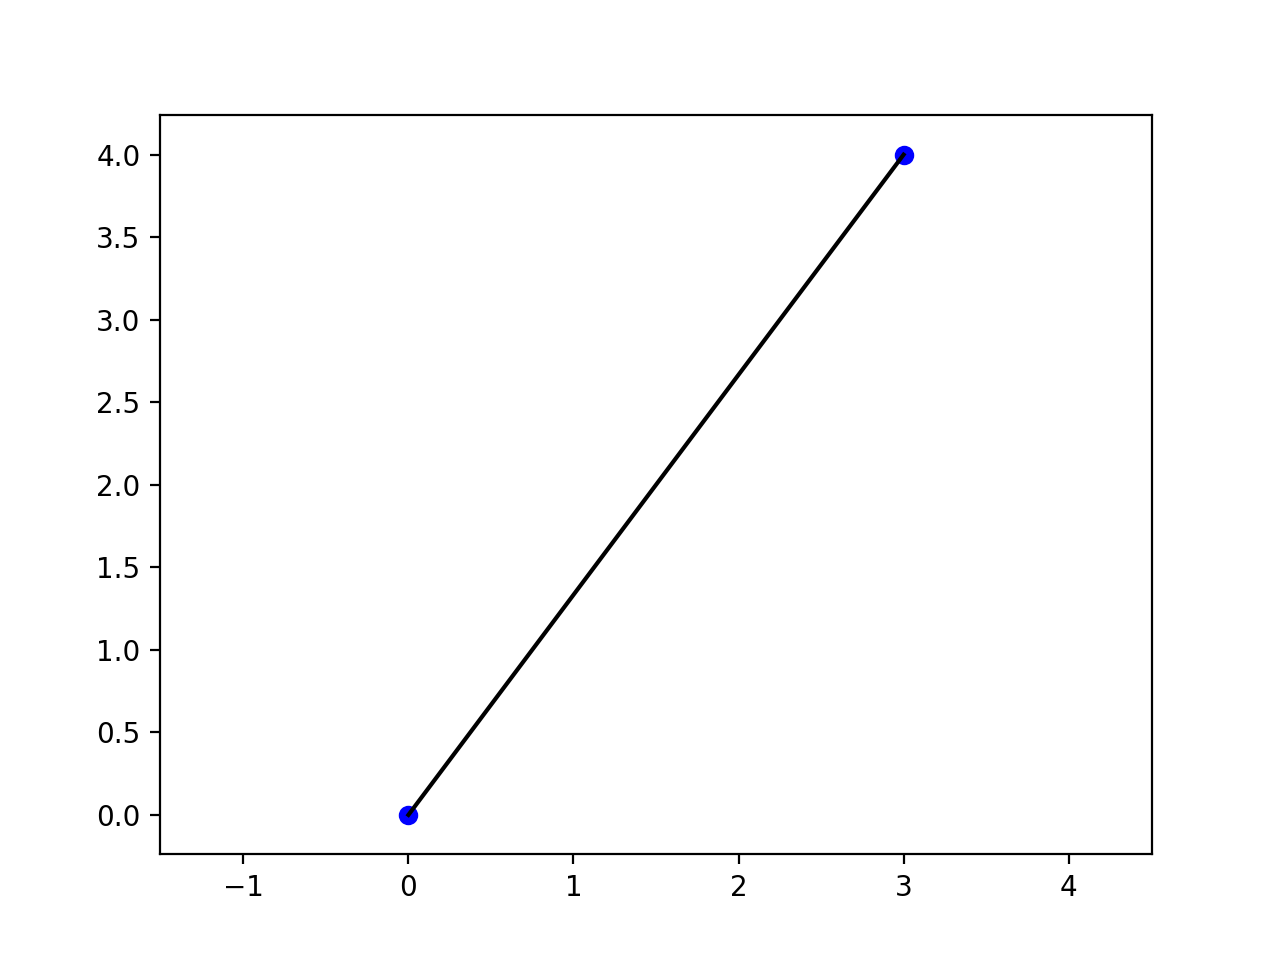

In [59]:
plt.plot([x1,x2],[y1,y2], c='black') # visualize the Euclidean distance
plt.scatter([x1,x2],[y1,y2], c='b')
plt.axis('equal')
plt.show()

In [60]:
np.sum(np.abs(p1 - p2)) # compute the sum distance

7

In [64]:
plt.plot([x1,x1],[y1, y2], c='black') # visualize the sum distance
plt.plot([x2, x1],[y2, y2], c='black')
plt.scatter([x1,x2],[y1,y2], c='b')
plt.axis('equal')
plt.show()

<IPython.core.display.Javascript object>

In [50]:
np.max(np.abs(p1 - p2)) # compute the maximum distance

4

<IPython.core.display.Javascript object>


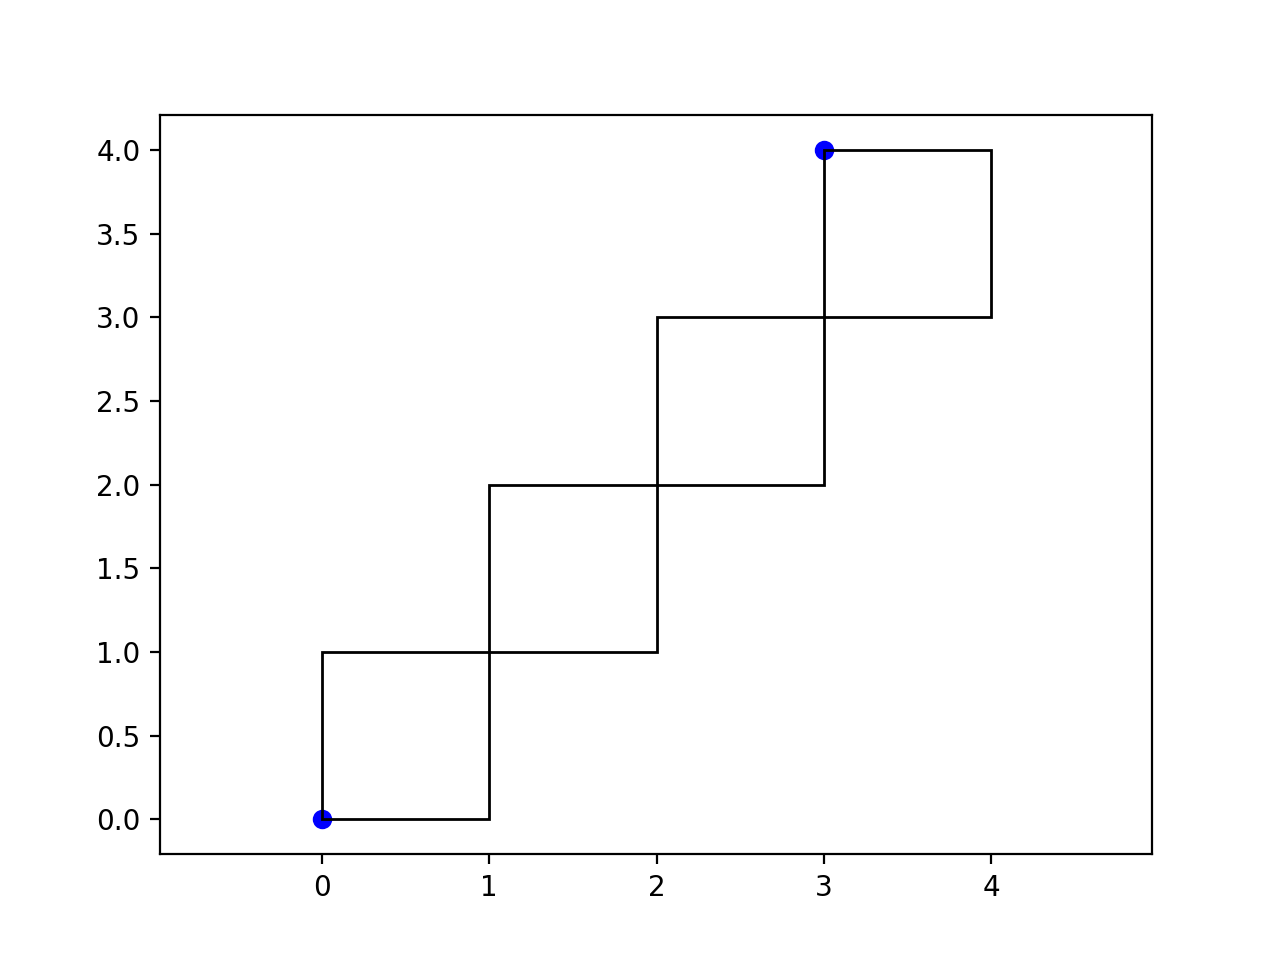

In [51]:
fig = plt.figure()
ax = fig.gca()

ax.scatter([x1,x2],[y1,y2], c='b') # scatter the points

# draw a rectangle for each move
for i in range(np.max(np.abs(p1 - p2))):
    rect1 = Rectangle((x1+i,y1+i),1,1,linewidth=1,edgecolor='black',facecolor='none')
    ax.add_patch(rect1)

ax.axis('equal')
plt.show()

### 1.3. Topological Data Analysis (TDA) problems

TDA studies shapes of point clouds and quantifies topological patterns in the data.

TDA roughly splits into two subareas : 

1. <i>data measurement</i> (extracting features) and 
2. <i>data representation</i> (approximating a shape of data in a simpler form).

This tutorial discusses topological methods for data representation. In the context of machine learning this subarea may belong to the unsupervised learning of stratified spaces such as graphs (in dimension 1), which are more complicated (and practical) than smooth manifolds.

The 0-dimensional example is the <i>clustering</i> problem when we split a point cloud into subgroups (clusters or connected components). 

A given point cloud can be high-dimensional, but the aim is to visualize subgroups (or approximate a cloud by 0-dimensional points, say centers of clusters).

The code producing a picture below shows that clustering can be non-trivial even in simple cases. The points are generated from two Gaussian distributions with distinct centers. The red and blue points from different samples are mixed and can be hard to split into two clusters.

In [62]:
# create gaussian noise arround a point
mean = np.array([3,5])
cov = np.array([[0.3,0.0], [0.0, 0.3]])
cluster1 = np.random.multivariate_normal(mean, cov, 100)

# create gaussian noise arround a second point
mean = np.array([4.5,5])
cov = np.array([[0.3,0.0], [0.0, 0.3]])
cluster2 = np.random.multivariate_normal(mean, cov, 100)

# plot the two clusters
fig, ax = plt.subplots()
ax.scatter(cluster1[:,0], cluster1[:,1], c='r')
ax.scatter(cluster2[:,0], cluster2[:,1], c='b')

plt.show()

<IPython.core.display.Javascript object>

### 1.4. Data skeletonization problem
For real data, we might be interested in finding more complicated patterns such as 1-dimensional cycles or 2-dimensional surfaces that well approximate a given point cloud.

For example, imagine that we start from a low-resolution scan of a black-and-white picture (a pencil sketch or a graphical symbol) and would like to digitize this picture (reconstruct a graph approximating an original pattern). Our ideal output can be a skeleton, say a 1-dimensional graph consisting of vertices and edges connecting these vertices.

<b>Problem statement</b>. Given a point cloud, find a graph approximating a 1-dimensional shape of the cloud. In addition, if we assume that a cloud is a noisy sample of an unknown graph, we can be interested in finding conditions on this graph and a cloud (with noise) such that the output graph is topologically and geometrically similar to the original graph.

The extended statement above can be called a <i>graph reconstruction</i> problem. 

A <i>topological similarity</i> may mean the same homotopy type (when one graph can be continuously deformed into another) or the same homeorphism type (when edge contractions are not allowed in deformations).

A <i>geometric similarity</i> may mean closeness with respect to a certain distance between graphs, for example the output graph should be in a small thickening of the original graph (or its noisy point sample) and vice versa.

The code below shows a random sample from a wheel graph (a rotated square with two diagonals) whose subclouds we will frequently used later.

<IPython.core.display.Javascript object>


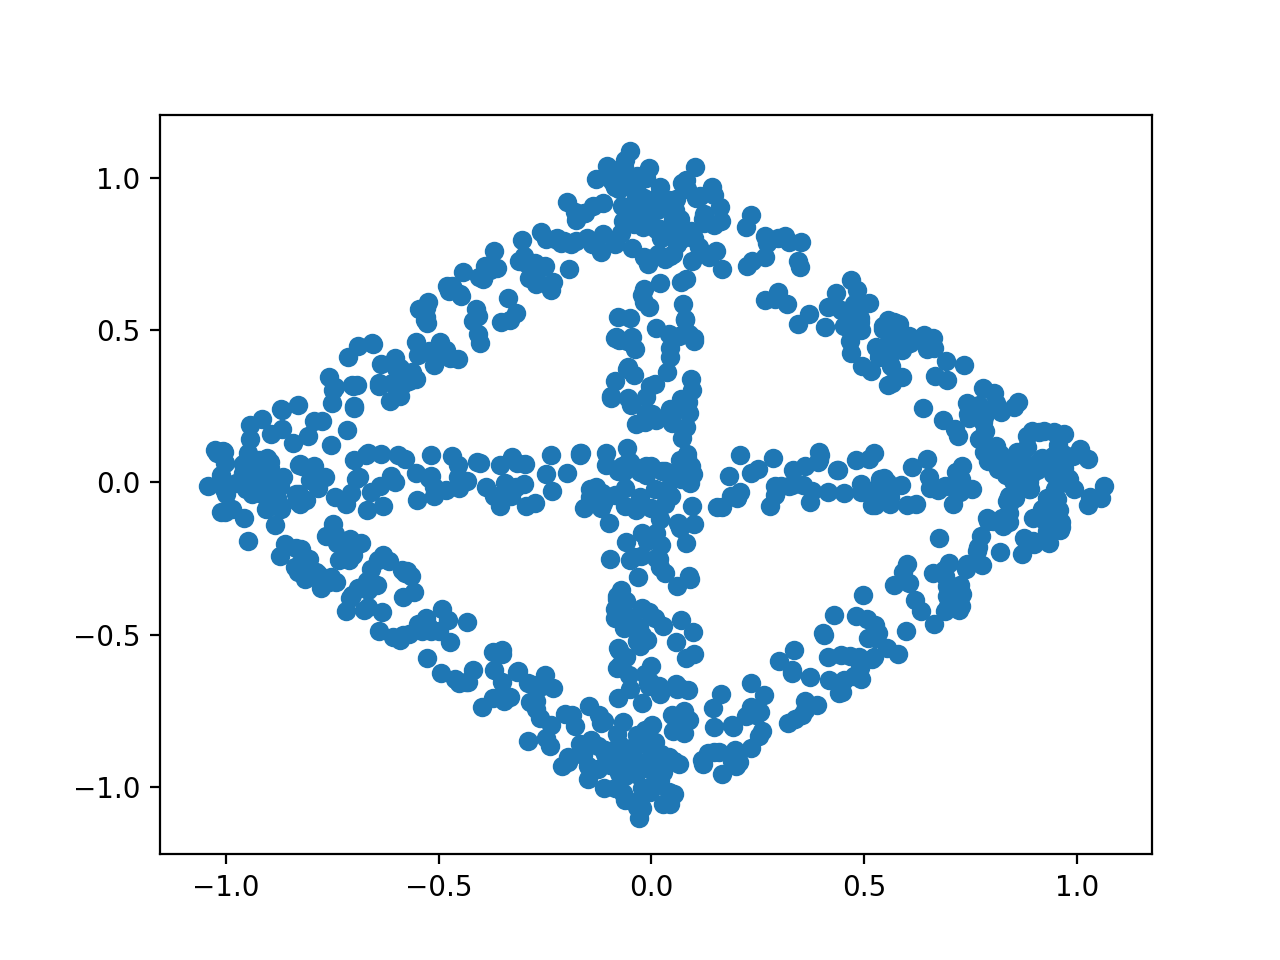

In [65]:
cloud = np.genfromtxt('data/wheel.txt', delimiter=' ') # load a noisy wheel graph
plt.scatter(cloud[:, 0], cloud[:, 1]) # plot the cloud
plt.show()

The following code shows how to select a random subcloud of points within a larger cloud.

<IPython.core.display.Javascript object>


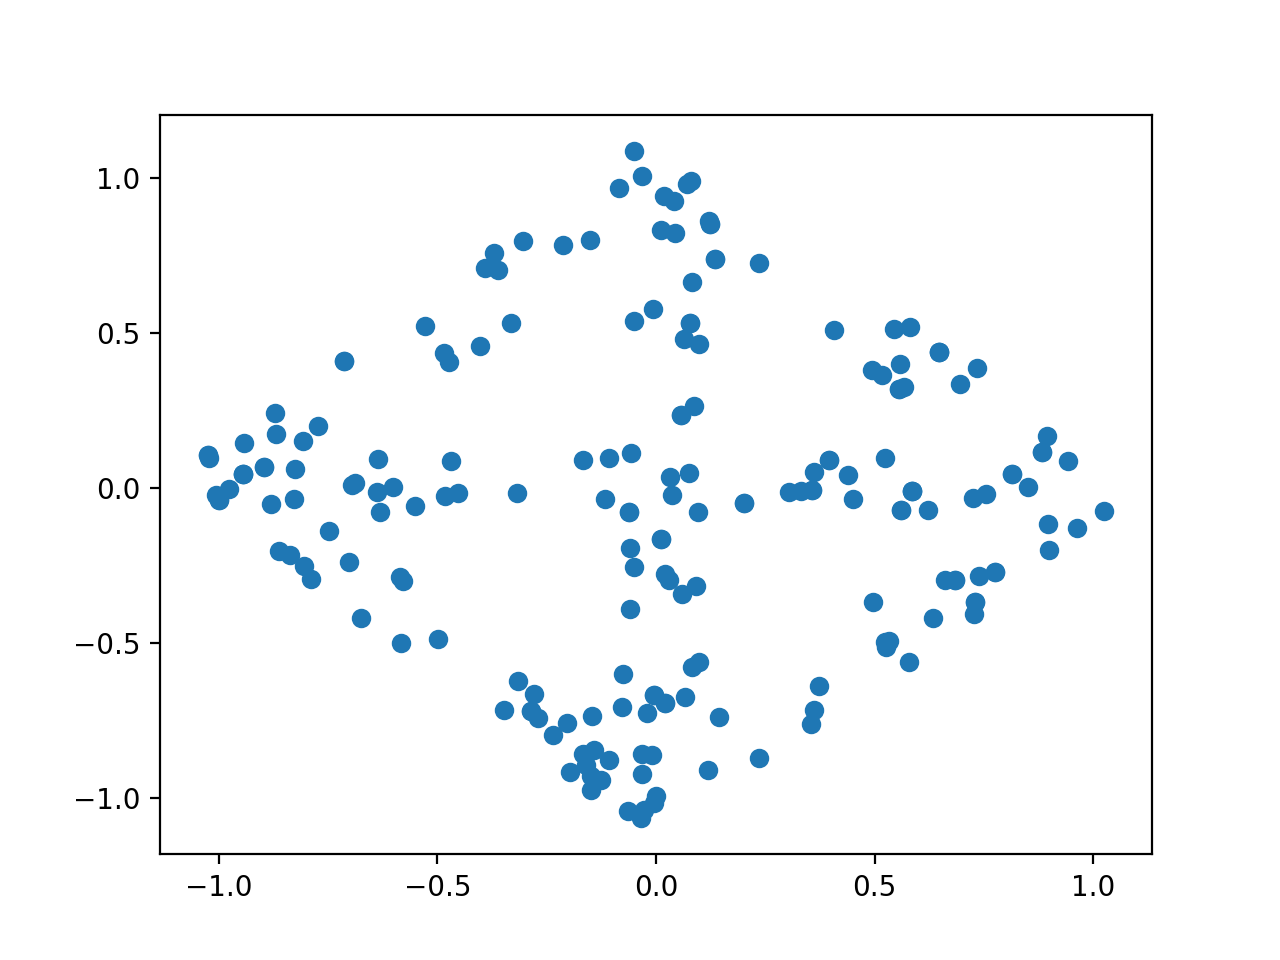

In [66]:
random_indices = np.random.choice( cloud.shape[0], 200 ) # sample 200 points from the shape
plt.scatter(cloud[random_indices, 0], cloud[random_indices, 1])
plt.show()

The following code projects the above subcloud to the horizontal $x$-axis. This simple example shows that a low-dimensional projection (if not chosen smartly) can easily destroy all patterns in the high-dimensional data.

<IPython.core.display.Javascript object>


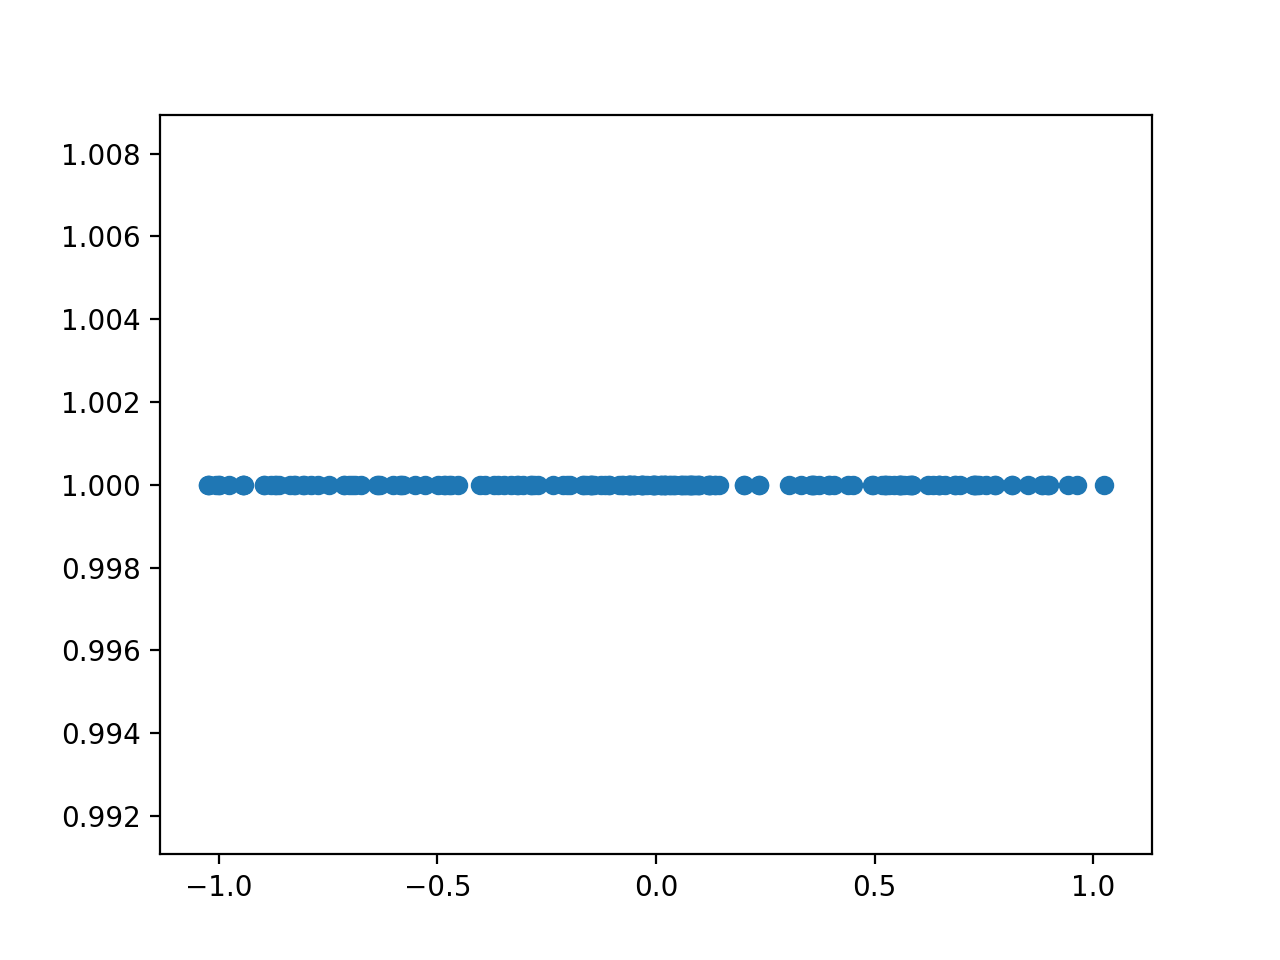

In [67]:
subcloud_size = len( cloud[random_indices, 0] )
plt.scatter( cloud[random_indices, 0], np.ones( subcloud_size ) ) # add a comment
plt.show()

The final code in this part visualizes the same subcloud in the 3-dimensional space by adding the trivial coordinate $z=0$.

<IPython.core.display.Javascript object>


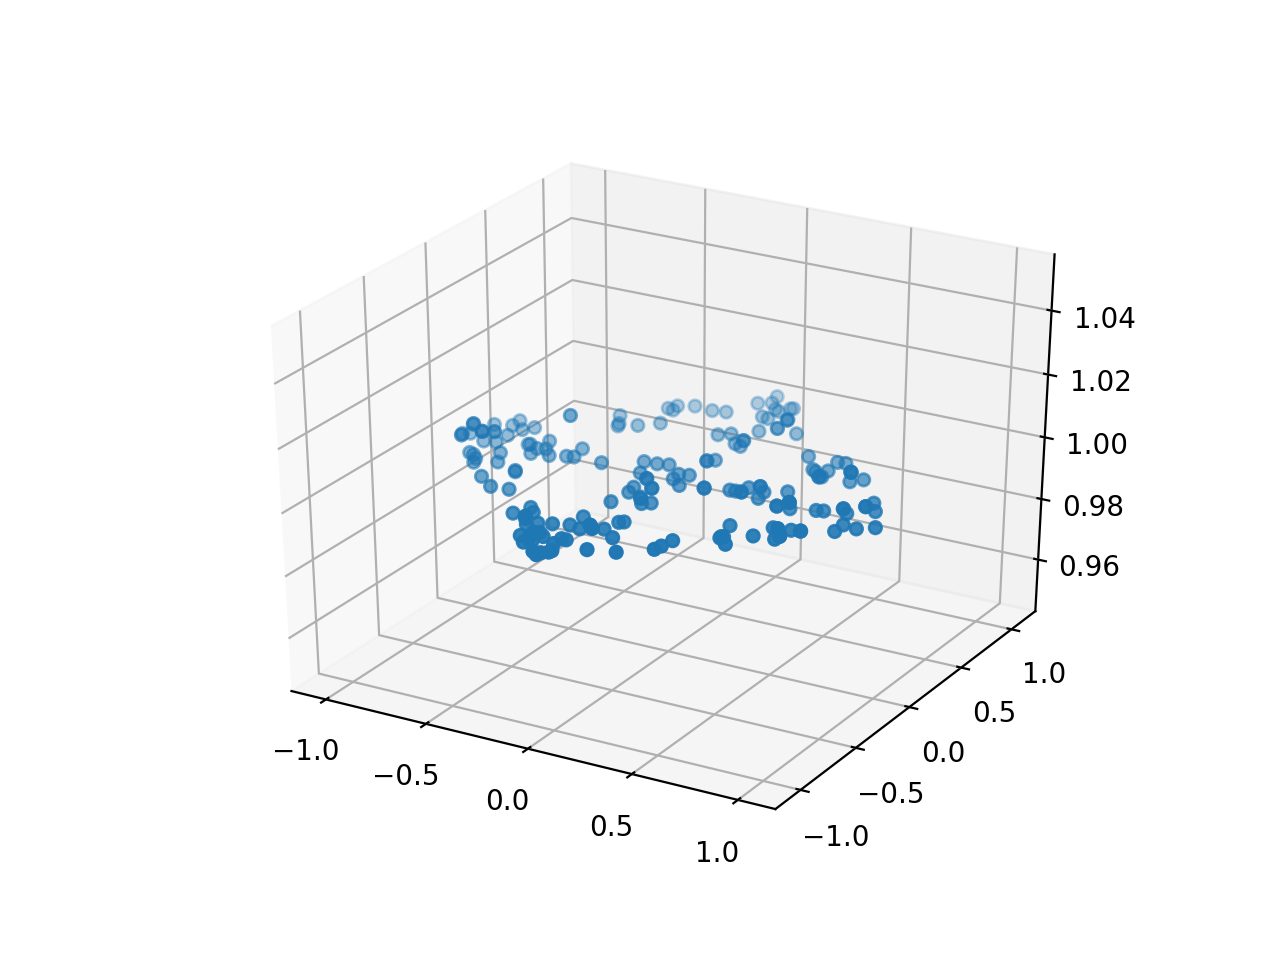

In [68]:
fig = plt.figure()
plot3d = fig.add_subplot(111, projection='3d')
plot3d.scatter( cloud[random_indices, 0], cloud[random_indices, 1], np.ones( subcloud_size) )
plt.show()